In [ ]:
#@title Decision trees and Prunning

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_iris

In [35]:
dataset=load_iris()

In [36]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
import seaborn as sns
df=sns.load_dataset("iris")

In [39]:
#dependent and independent fetures
x=df.iloc[:,:-1]
y=dataset.target

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [44]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.55\nentropy = 1.558\nsamples = 49\nvalue = [12, 18, 19]'),
 Text(0.4, 0.5, 'x[3] <= 0.7\nentropy = 0.971\nsamples = 30\nvalue = [12, 18, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 19]')]

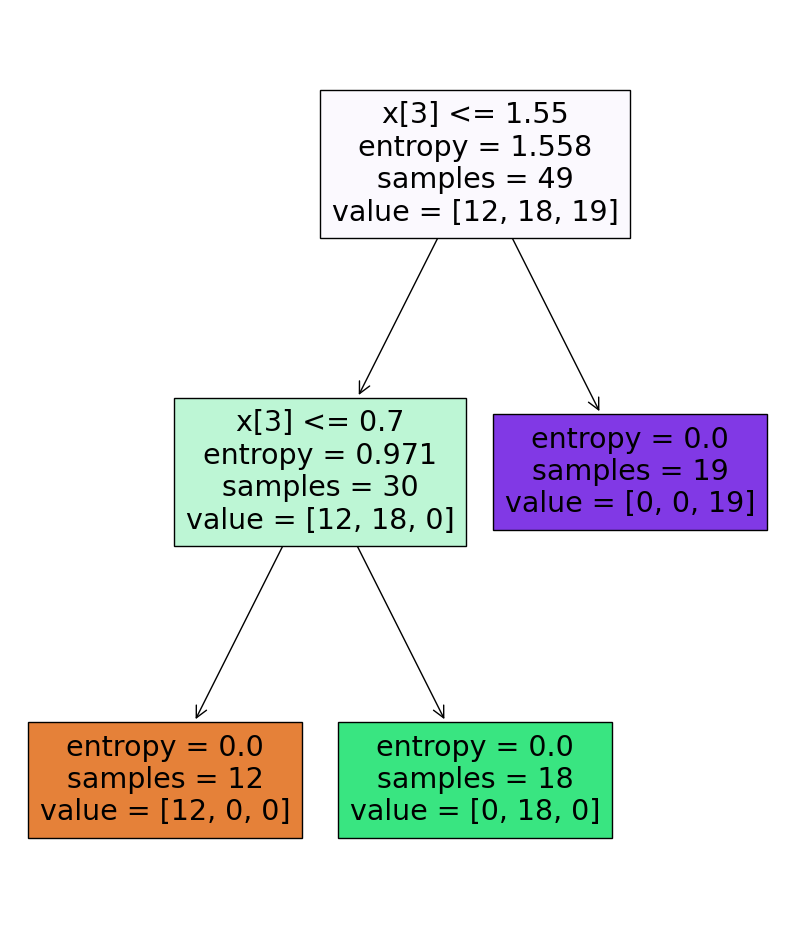

In [45]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(classifier,filled=True)

In [46]:
#after this we are going to predict the outputs for the y_test values just like regression

In [47]:
#@title Decision tree Regressor

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
##california House price prediction
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [50]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [51]:
df=pd.DataFrame(data=california_df.data,columns=california_df.feature_names)
df["Traget"]=california_df.target

In [52]:
df.shape

(20640, 9)

In [53]:
df=df.sample(frac=0.25)

In [54]:
df.shape

(5160, 9)

In [55]:
#spliting the dependent and independent variables


#independent variables
x=df.iloc[:,:-1]


#dependent variables
y=df.iloc[:,-1]

In [56]:
#tarin test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.33,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [58]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [59]:
y_pred=regressor.predict(x_test)

In [60]:
y_pred

array([1.428  , 1.298  , 2.045  , ..., 3.575  , 5.00001, 2.429  ])

In [61]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [62]:
score

0.4702340382294411

In [63]:
#hyperparameter tuning
parameter={

           'criterion':['squared_error','friedman_mse','absolute_error','poission'],
           'splitter':['best','random'],
           'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
           'max_features':['auto','sqrt','log2']
}
regressor=DecisionTreeRegressor()

In [64]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorCV=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [65]:
regressorCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poission'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [66]:
regressorCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [67]:
y_pred=regressorCV.predict(x_test)

In [68]:
r2_score(y_test,y_pred)

0.5860694702889371